In [1]:
from google.colab import drive

In [2]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
data = pd.read_csv("/content/gdrive/MyDrive/oasis/Unemployment in India.csv")

In [5]:
print(data.head())

           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


In [6]:
print(data.isnull().sum())

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


<ipython-input-8-0c964a6ebb84>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-8-0c964a6ebb84>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


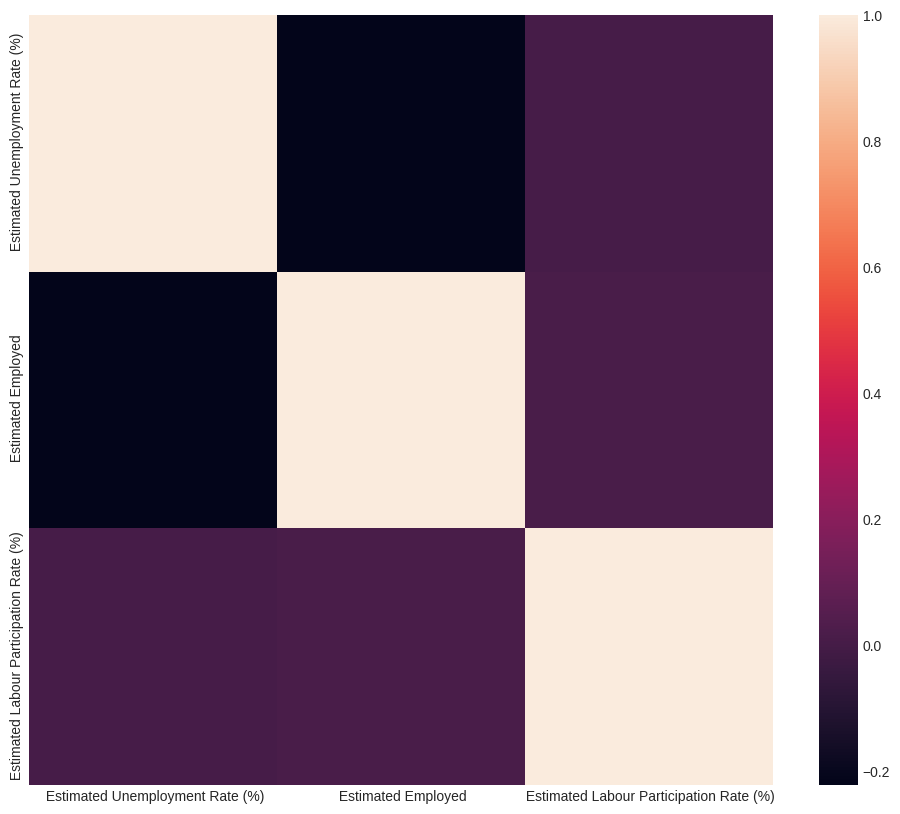

In [8]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr())
plt.show()

In [13]:
data.columns

Index(['Frequency', 'Estimated Unemployment Rate', 'Estimated Employed',
       'Estimated Labour Participation Rate', 'Region', 'longitude',
       'latitude'],
      dtype='object')

In [14]:
data.shape

(768, 7)

In [65]:
data

,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
data.describe()

,Estimated Labour Participation Rate,Region,longitude
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Frequency                            740 non-null    object 
 1   Estimated Unemployment Rate          740 non-null    object 
 2   Estimated Employed                   740 non-null    object 
 3   Estimated Labour Participation Rate  740 non-null    float64
 4   Region                               740 non-null    float64
 5   longitude                            740 non-null    float64
 6   latitude                             740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


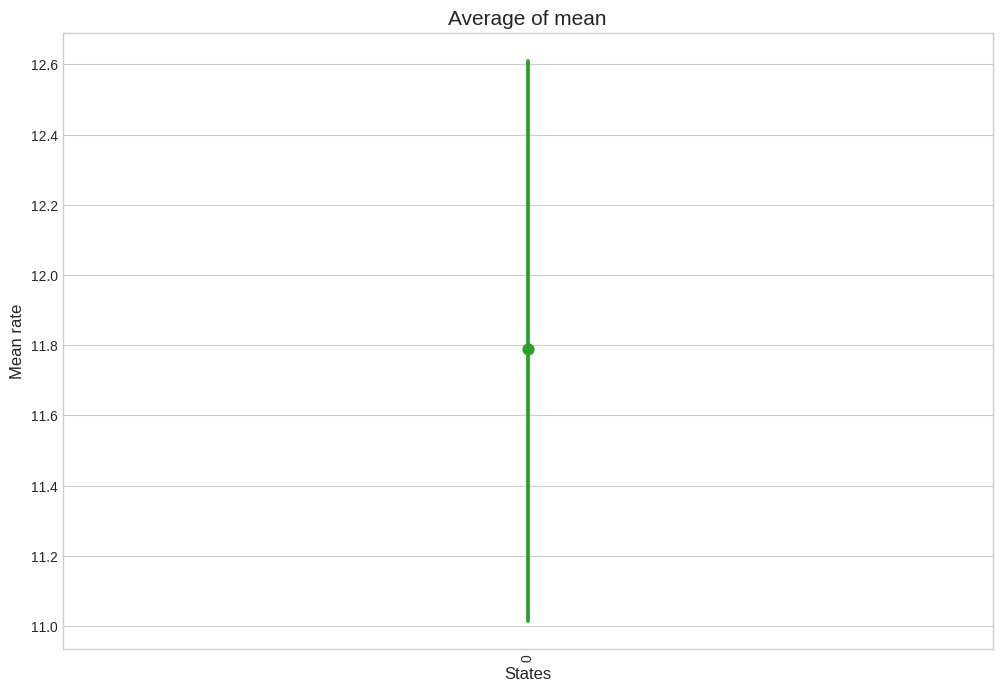

In [36]:
grouped_df = data.groupby(["Region"])["Estimated Labour Participation Rate"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot( grouped_df['Estimated Labour Participation Rate'].values,  color=color[2])
plt.ylabel('Mean rate', fontsize=12)
plt.xlabel('States', fontsize=12)
plt.title("Average of mean", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [31]:
data.head()

,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [38]:
data.Frequency.nunique()

28

In [45]:
make_total = data.pivot_table("Region",index=['Frequency'],aggfunc='mean')
topstate=make_total.sort_values(by='Region',ascending=False)[:47]
print(topstate)

                        Region
Frequency                     
Uttar Pradesh     2.809483e+07
Maharashtra       1.999020e+07
West Bengal       1.719854e+07
Bihar             1.236619e+07
Tamil Nadu        1.226955e+07
Gujarat           1.140201e+07
Madhya Pradesh    1.111548e+07
Karnataka         1.066712e+07
Rajasthan         1.004106e+07
Andhra Pradesh    8.154093e+06
Telangana         7.939663e+06
Odisha            6.545747e+06
Assam             5.354772e+06
Punjab            4.539362e+06
Jharkhand         4.469240e+06
Kerala            4.425900e+06
Chhattisgarh      4.303499e+06
Haryana           3.557072e+06
Delhi             2.627513e+06
Jammu & Kashmir   1.799932e+06
Uttarakhand       1.390228e+06
Himachal Pradesh  1.059824e+06
Tripura           7.170026e+05
Meghalaya         6.897368e+05
Chandigarh        3.168312e+05
Goa               2.263083e+05
Puducherry        2.122781e+05
Sikkim            1.068807e+05


In [54]:
maketotal_1 = data.pivot_table(values='Region',index=['Estimated Employed','Frequency','latitude'],aggfunc=np.std)
df1 = maketotal_1.reset_index().dropna(subset=['Region'])
df2 = df1.loc[df1.groupby('Frequency')['Region'].idxmax()]
for index,row in df2.iterrows():
  print(row['Frequency'],"State which",row['latitude'],"has the highest yearly fluncation.")

Andhra Pradesh State which Rural has the highest yearly fluncation.
Assam State which Rural has the highest yearly fluncation.
Bihar State which Rural has the highest yearly fluncation.
Chandigarh State which Urban has the highest yearly fluncation.
Chhattisgarh State which Rural has the highest yearly fluncation.
Delhi State which Urban has the highest yearly fluncation.
Goa State which Urban has the highest yearly fluncation.
Gujarat State which Rural has the highest yearly fluncation.
Haryana State which Rural has the highest yearly fluncation.
Himachal Pradesh State which Rural has the highest yearly fluncation.
Jammu & Kashmir State which Rural has the highest yearly fluncation.
Jharkhand State which Rural has the highest yearly fluncation.
Karnataka State which Rural has the highest yearly fluncation.
Kerala State which Rural has the highest yearly fluncation.
Madhya Pradesh State which Rural has the highest yearly fluncation.
Maharashtra State which Rural has the highest yearly 

Text(0, 0.5, 'Count')

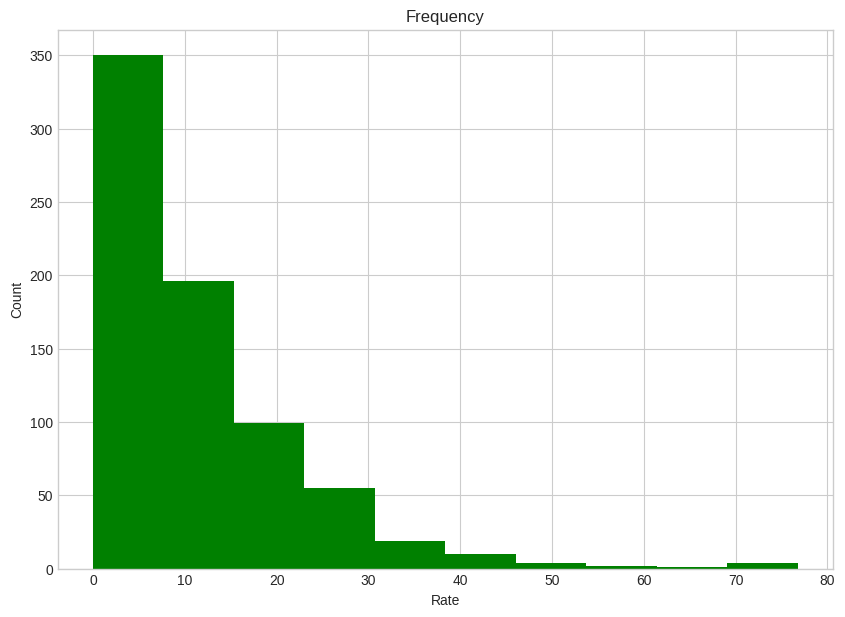

In [64]:
plt.figure(figsize = (10, 7))
x = data["Estimated Labour Participation Rate"]

plt.hist(x, color = "green")
plt.title("Frequency")
plt.xlabel("Rate")
plt.ylabel("Count")

In [60]:
data.columns

Index(['Frequency', 'Estimated Unemployment Rate', 'Estimated Employed',
       'Estimated Labour Participation Rate', 'Region', 'longitude',
       'latitude'],
      dtype='object')

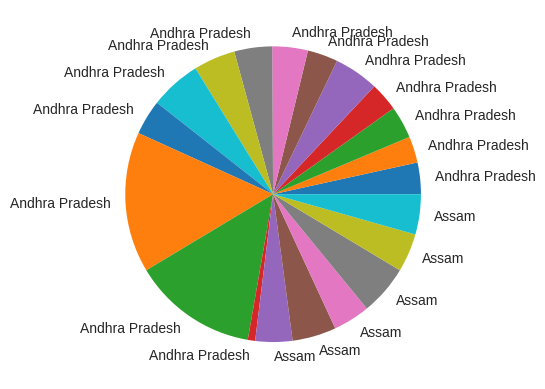

In [62]:
head = data.head(20)
x = head["Estimated Labour Participation Rate"]
y = head["Frequency"]
plt.pie(x,labels=y)
plt.show()

In [83]:
states = ['Andhra Pradesh', 'Assam',  'Bihar','California', 'Chandigarh  ', 'Delhi', 'Gujarat',  'Goa','Himachal Pradesh', 'Jharkhand' 'Karnataka',  'Madhya Pradesh','Meghalaya','Maharastra' ,  'Punjab','Puducherry ', 'Rajasthan ', 'Sikkim',  'Tripura', 'Tamil Nadu', 'Uttar Pradesh','West Bengal' ]
for i in states:
  print(i in data['Frequency'].unique())

True
True
True
False
False
True
True
True
True
False
True
True
False
True
False
False
True
True
True
True
True


In [84]:
Exp = data.groupby('Region').max()
Exp

,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,longitude,latitude
Region,,,,,,
49420.0,Puducherry,30-04-2020,Monthly,74.51,46.79,Rural
64538.0,Puducherry,31-05-2020,Monthly,75.00,31.25,Urban
68122.0,Puducherry,30-04-2020,Monthly,76.74,35.54,Urban
75456.0,Sikkim,31-05-2020,Monthly,19.75,43.32,Urban
76269.0,Sikkim,30-06-2020,Monthly,2.63,35.85,Urban
...,...,...,...,...,...,...
43298746.0,Uttar Pradesh,31-08-2019,Monthly,11.47,40.24,Rural
44198762.0,Uttar Pradesh,30-09-2019,Monthly,6.45,38.79,Rural
44257432.0,Uttar Pradesh,29-02-2020,Monthly,8.12,39.13,Rural


In [86]:
state_count = data.groupby('Frequency').count()
print(state_count['Estimated Labour Participation Rate'])

Frequency
Andhra Pradesh      28
Assam               26
Bihar               28
Chandigarh          12
Chhattisgarh        28
Delhi               28
Goa                 24
Gujarat             28
Haryana             28
Himachal Pradesh    28
Jammu & Kashmir     21
Jharkhand           28
Karnataka           28
Kerala              28
Madhya Pradesh      28
Maharashtra         28
Meghalaya           27
Odisha              28
Puducherry          26
Punjab              28
Rajasthan           28
Sikkim              17
Tamil Nadu          28
Telangana           28
Tripura             28
Uttar Pradesh       28
Uttarakhand         27
West Bengal         28
Name: Estimated Labour Participation Rate, dtype: int64


In [91]:
h= data.loc[data['Frequency']=='West Bengal']
h

,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude
345,West Bengal,31-05-2019,Monthly,6.02,23452875.0,46.41,Rural
346,West Bengal,30-06-2019,Monthly,5.85,25543465.0,50.36,Rural
347,West Bengal,31-07-2019,Monthly,5.62,24857807.0,48.78,Rural
348,West Bengal,31-08-2019,Monthly,5.58,24924827.0,48.79,Rural
349,West Bengal,30-09-2019,Monthly,5.26,25610773.0,49.87,Rural
350,West Bengal,31-10-2019,Monthly,6.78,24353018.0,48.09,Rural
351,West Bengal,30-11-2019,Monthly,5.83,25630359.0,50.00,Rural
352,West Bengal,31-12-2019,Monthly,5.79,24906239.0,48.47,Rural
353,West Bengal,31-01-2020,Monthly,6.79,24612171.0,48.30,Rural
354,West Bengal,29-02-2020,Monthly,3.78,26093009.0,49.51,Rural


In [94]:
index = data.set_index('Frequency')
Sort = index.sort_values(by=['Region'])
Sort['Region']

Frequency
Puducherry    49420.0
Puducherry    64538.0
Puducherry    68122.0
Sikkim        75456.0
Sikkim        76269.0
               ...   
NaN               NaN
NaN               NaN
NaN               NaN
NaN               NaN
NaN               NaN
Name: Region, Length: 768, dtype: float64

In [98]:
Sort['Estimated Labour Participation Rate'].head(20)

Frequency
Puducherry    74.51
Puducherry    75.00
Puducherry    76.74
Sikkim        19.75
Sikkim         2.63
Sikkim         5.77
Sikkim        20.45
Sikkim         9.68
Sikkim         7.37
Sikkim         4.81
Sikkim         8.20
Sikkim         7.76
Sikkim         4.82
Sikkim         4.04
Sikkim         2.56
Delhi         21.14
Delhi         20.69
Goa           20.00
Delhi         22.76
Sikkim         0.00
Name: Estimated Labour Participation Rate, dtype: float64